In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
# Load the data
df = pd.read_csv('floralarea.csv')

In [14]:
# Print the first few rows of the DataFrame
df.head()

,area,mask,images,flower_number,distance,imagej_area,flower_color,morphology,Notes
0,7.266297,api/data/output/flower_0.5_55cfe032-8b9a-49e5-...,PXL_20240214_172530114_80cm_F6_.jpg,F6,80cm,7.953,T1,C1,NaN
1,0.583452,api/data/output/flower_0.5_2d05f0cf-fb5e-43f7-...,PXL_20240214_173554009_80cm_F11_.jpg,F11,80cm,0.522,T5,C3,NaN
2,4.429895,api/data/output/flower_0.5_bbd65693-d4cf-418c-...,PXL_20240214_175708911_100cm_F23_.jpg,F23,100cm,5.567,T3,C2,Area is off
3,3.113293,api/data/output/flower_0.5_cf292e22-f35e-4caf-...,PXL_20240214_175352365_100cm_F21_.jpg,F21,100cm,3.053,T2,C2,NaN
4,20.535137,api/data/output/flower_0.5_00c41aee-211f-4968-...,PXL_20240214_174000188_80cm_F13_.jpg,F13,80cm,20.396,T4,C3,NaN


In [15]:
# filtere columns 
data = df[['area','flower_number','distance','imagej_area','flower_color','morphology']]

In [48]:
# Print the first few rows of the DataFrame
data.head()

,area,flower_number,distance,imagej_area,flower_color,morphology,abs_diff,diff
0,7.266297,F6,80cm,7.953,T1,C1,0.686703,0.686703
1,0.583452,F11,80cm,0.522,T5,C3,0.061452,-0.061452
2,4.429895,F23,100cm,5.567,T3,C2,1.137105,1.137105
3,3.113293,F21,100cm,3.053,T2,C2,0.060293,-0.060293
4,20.535137,F13,80cm,20.396,T4,C3,0.139137,-0.139137


In [17]:
# describe
data.describe()

,area,imagej_area
count,75.000000,75.000000
mean,10.578257,10.542827
std,12.311980,12.312769
min,0.000000,0.447000
25%,2.971319,2.909000
50%,5.843431,5.994000
75%,14.896047,14.041500
max,58.743061,55.739000


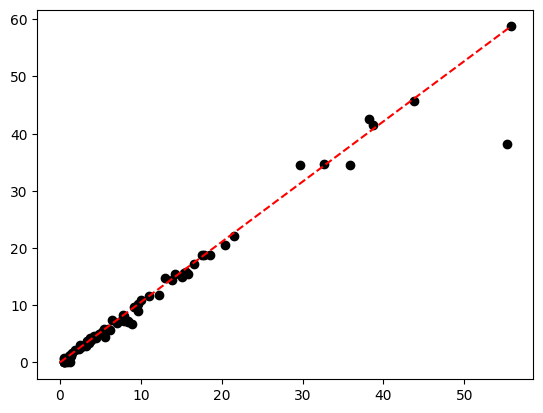

In [31]:
# plot
plt.plot(data['imagej_area'], data['area'], 'o', color='black')
plt.plot([0, max(data['imagej_area'])], [0, max(data['area'])], 'r--')



In [34]:
# absolute difference
data['abs_diff'] = abs(data['imagej_area'] - data['area'])
data['diff'] = data['imagej_area'] - data['area']

/var/folders/r5/48dgr3g12qg3cwmg9f6v0cwc0000gn/T/ipykernel_61487/2060323613.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['abs_diff'] = abs(data['imagej_area'] - data['area'])
/var/folders/r5/48dgr3g12qg3cwmg9f6v0cwc0000gn/T/ipykernel_61487/2060323613.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['diff'] = data['imagej_area'] - data['area']


In [44]:
data[["flower_color", "imagej_area", "area", "abs_diff", "diff"]].groupby("flower_color").mean()

,imagej_area,area,abs_diff,diff
flower_color,,,,
T1,4.698556,4.454990,0.407727,0.243566
T2,4.815800,4.828648,0.317285,-0.012848
T3,11.402714,11.784076,0.689364,-0.381361
T4,23.083235,23.057701,2.379396,0.025534
T5,0.507250,0.325815,0.298065,0.181435


In [45]:
data[["morphology", "imagej_area", "area", "abs_diff", "diff"]].groupby("morphology").mean()

,imagej_area,area,abs_diff,diff
morphology,,,,
C1,4.698556,4.454990,0.407727,0.243566
C2,8.658167,8.885981,0.534331,-0.227814
C3,18.783048,18.727818,1.982952,0.055229


In [46]:
data[["distance", "imagej_area", "area", "abs_diff", "diff"]].groupby("distance").mean()

,imagej_area,area,abs_diff,diff
distance,,,,
100cm,8.475481,8.738705,0.758645,-0.263223
60cm,9.155455,9.127598,0.572360,0.027857
80cm,11.676565,11.326086,1.344238,0.350479
90cm,30.631000,32.039051,1.408051,-1.408051
